### Matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

resultsdf = pd.read_csv('http://128.198.162.191/pydev/dataFiles/OLYMPICS/olympics_1896-2024.csv')

In [2]:
resultsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24012 entries, 0 to 24011
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        24012 non-null  int64 
 1   City        24012 non-null  object
 2   Sport       24012 non-null  object
 3   Discipline  24012 non-null  object
 4   Athlete     20388 non-null  object
 5   Country     24012 non-null  object
 6   Gender      24012 non-null  object
 7   EventType   24012 non-null  object
 8   Medal       24012 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.6+ MB


In [3]:
resultsdf.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,EventType,Medal
0,2024,Paris,Cycling Road,Men Individual Time Trial,Evenepoel Remco,Belgium,Male,Athlete,Gold
1,2024,Paris,Cycling Road,Men Individual Time Trial,Ganna Filippo,Italy,Male,Athlete,Silver
2,2024,Paris,Cycling Road,Men Individual Time Trial,Van Aert Wout,Belgium,Male,Athlete,Bronze
3,2024,Paris,Cycling Road,Women Individual Time Trial,Brown Grace,Australia,Female,Athlete,Gold
4,2024,Paris,Cycling Road,Women Individual Time Trial,Henderson Anna,Great Britain,Female,Athlete,Silver


### Number of medals by country

In [4]:
medalsCountry = resultsdf.groupby('Country')['Medal'].count().sort_values(ascending = False)

medalsCountry

Country
United States of America    3424
Germany                     1280
Soviet Union                1272
Great Britain               1207
France                      1139
                            ... 
Paraguay                       1
Guyana                         1
Iraq                           1
Samoa                          1
Sudan                          1
Name: Medal, Length: 162, dtype: int64

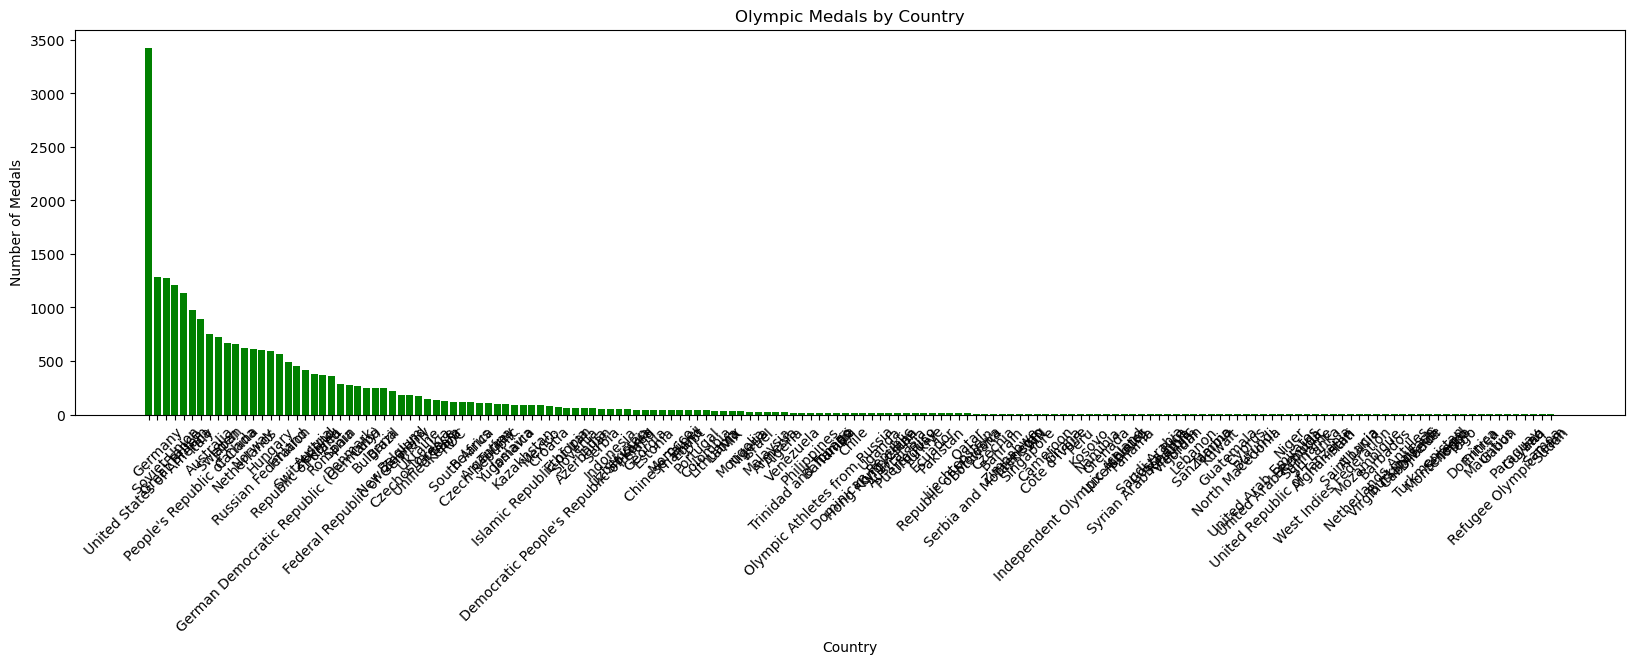

In [5]:
# Visualize this data

# Format the chart

plt.figure(figsize = (20, 5))

# Format the chart (bar), we need to pass the 'X' and 'Y' information and labels

plt.bar(medalsCountry.index, medalsCountry.values, color = 'green')

plt.title("Olympic Medals by Country")

plt.xlabel("Country")

plt.ylabel("Number of Medals")

# Rotates countries by 90 degrees

plt.xticks(rotation = 45)

# Display the visualization

plt.show()

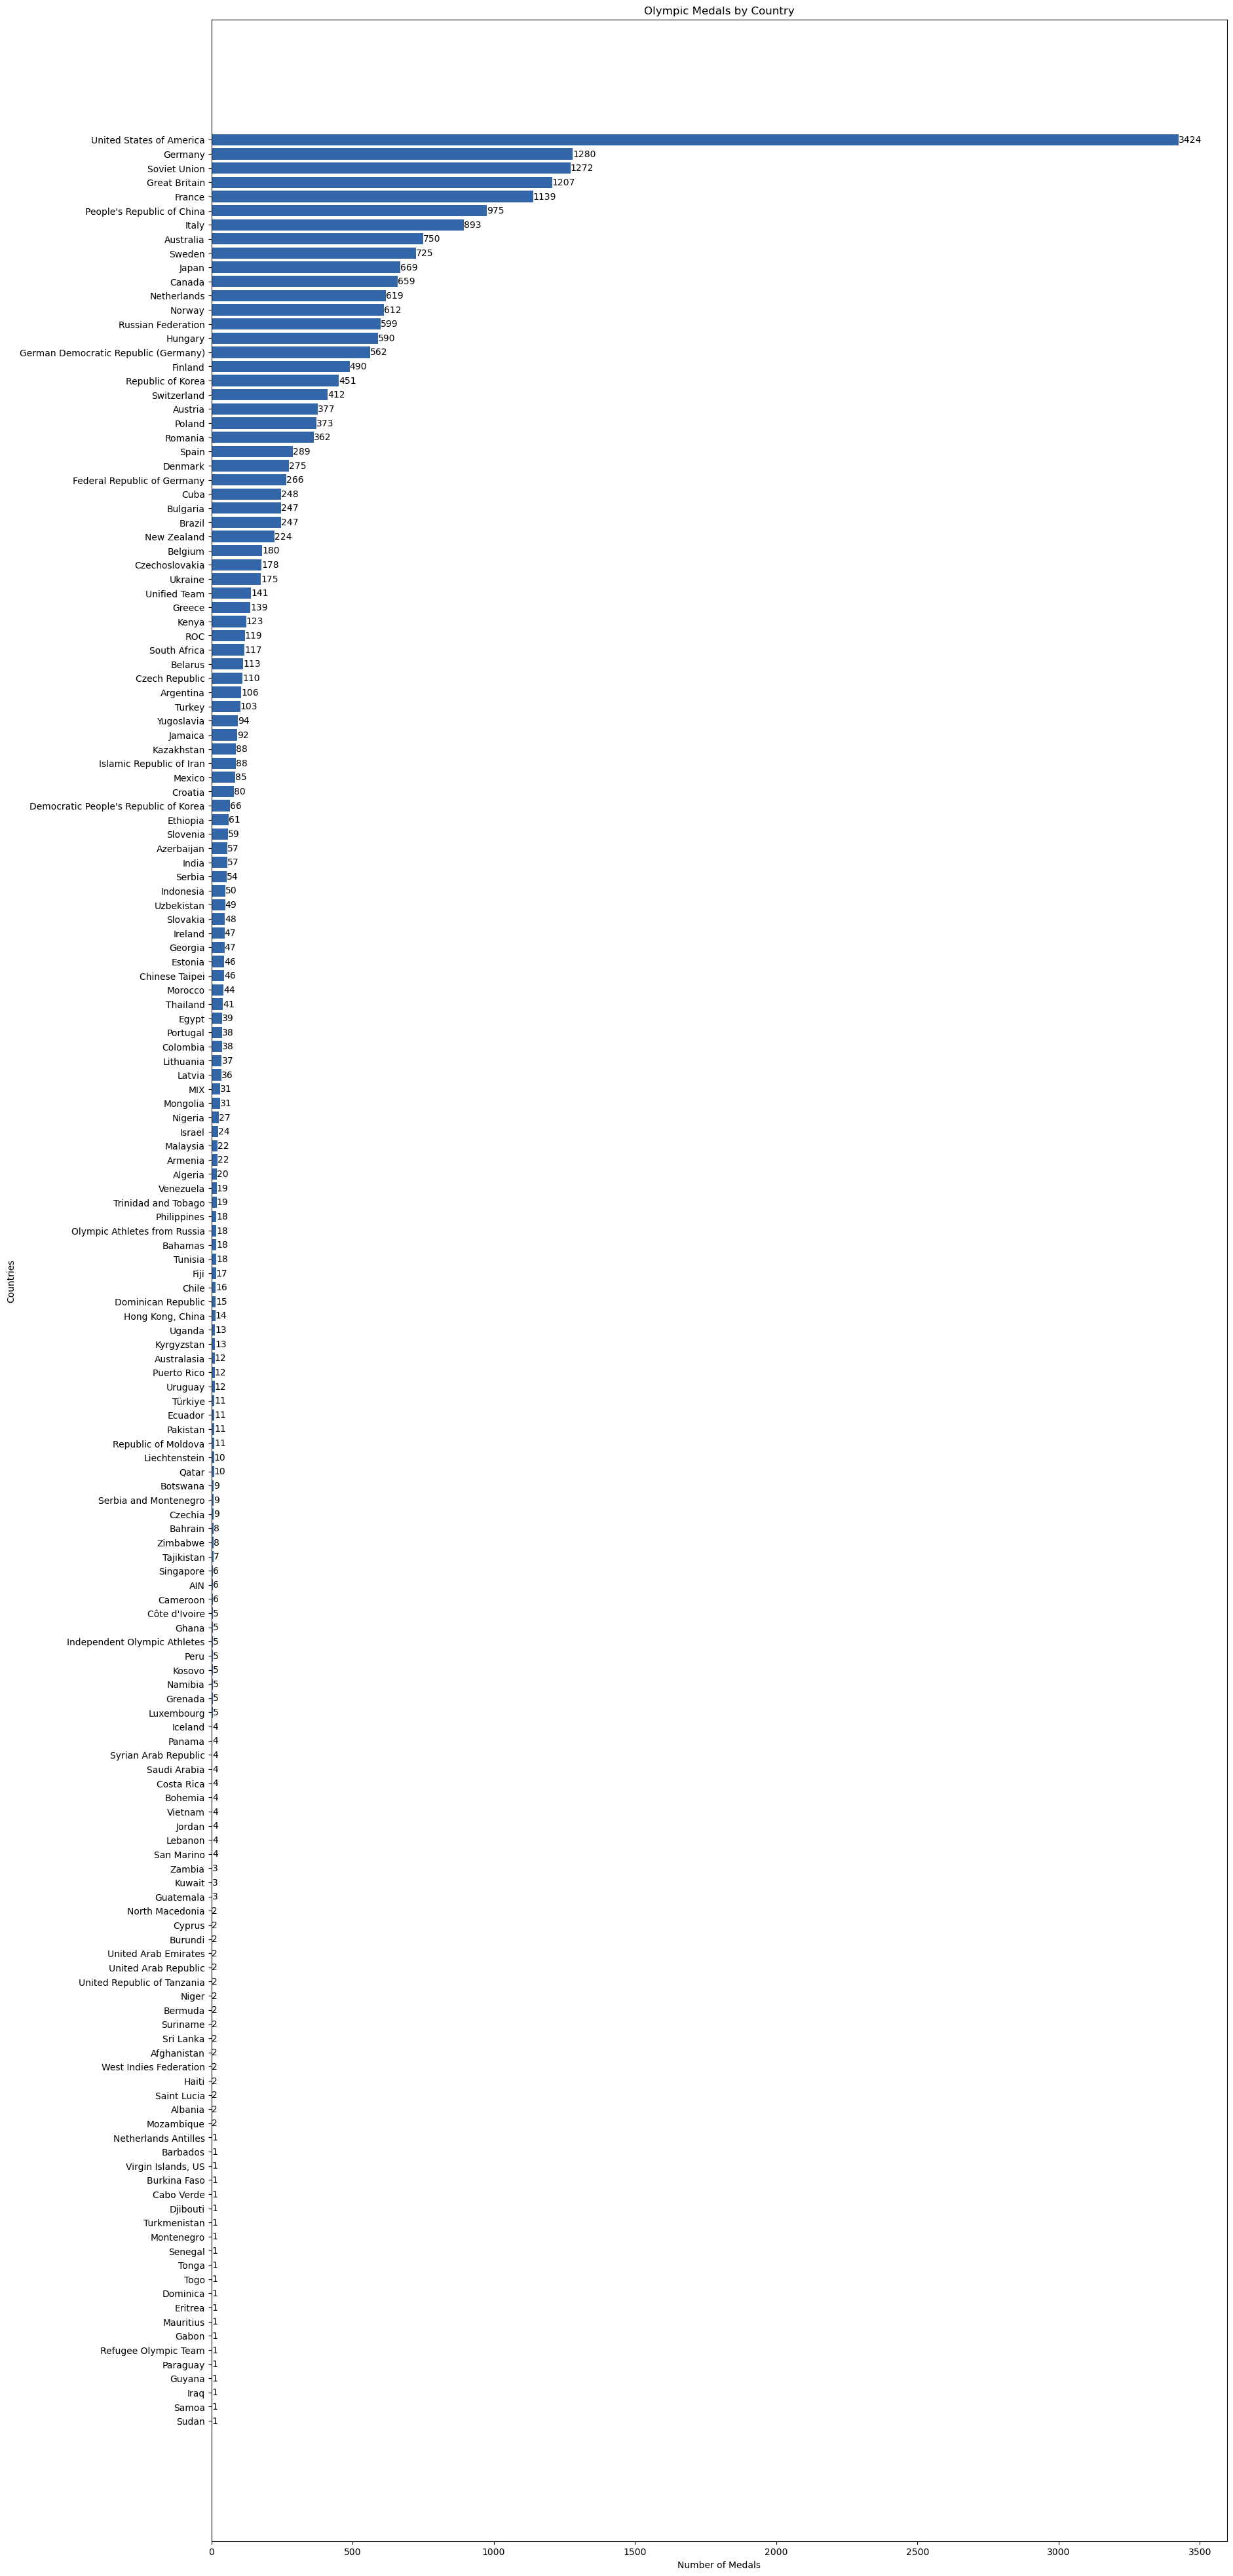

In [6]:
# Format the chart

plt.figure(figsize = (20, 50))

# Format the chart (bar), we need to pass the 'X' and 'Y' information and labels

bars = plt.barh(medalsCountry.index, medalsCountry.values, color = '#3266a8')

plt.title("Olympic Medals by Country")

plt.xlabel("Number of Medals")

plt.ylabel("Countries")

# Invert the "Y" axis to show the highest values at the top

# GCA stands for Get the Current Axis

plt.gca().invert_yaxis()

# Include values in the bar chart

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, # position the text
    f'{bar.get_width():.0f}', # Format text in integer
    va = 'center') # Align the text vertically to the center of the bar

# Display the visualization

plt.show()

### Pie chart for USA medals

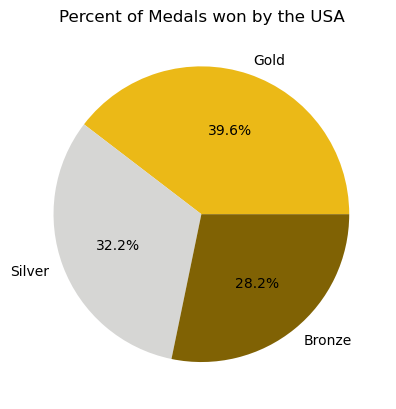

In [7]:
# Filter the data

usResults = resultsdf[resultsdf['Country'] == 'United States of America']

# Calculate the number of gold, silver, and bronze medals

medalCounts = usResults['Medal'].value_counts()

# Define custom colors

colors = ['#ebb917', '#d6d6d4', '#806204']

# Create a pi chart

plt.pie(medalCounts.values, labels = medalCounts.index, autopct = '%1.1f%%', colors = colors)

# Add a title

plt.title("Percent of Medals won by the USA")

# Show the chart

plt.show()

### Line chart example of the USA gold medals per year

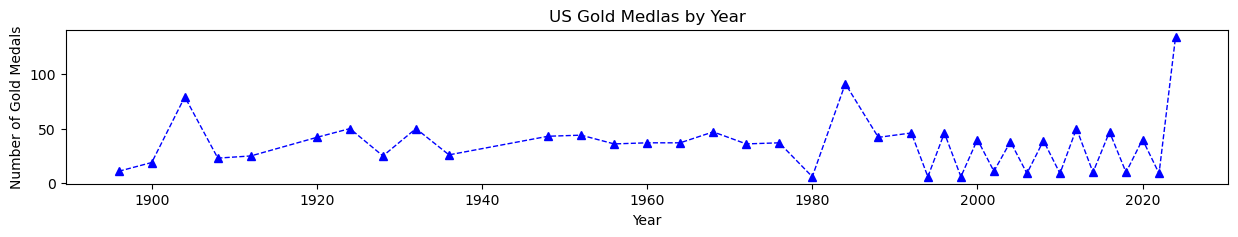

In [8]:
# filter our data

usGold = resultsdf[(resultsdf.Country == 'United States of America') & (resultsdf.Medal == 'Gold')]

# Group data to count the number of medals

usGoldYr = usGold.groupby('Year')['Medal'].count()

# Visualize the data

plt.figure(figsize = (15, 2))

#Format the look of the line

plt.plot(usGoldYr.index, usGoldYr.values, color = 'blue', linestyle = '--', linewidth = 1, marker = '^', markersize = 6)

plt.title("US Gold Medlas by Year")
plt.xlabel('Year')
plt.ylabel('Number of Gold Medals')
plt.show()


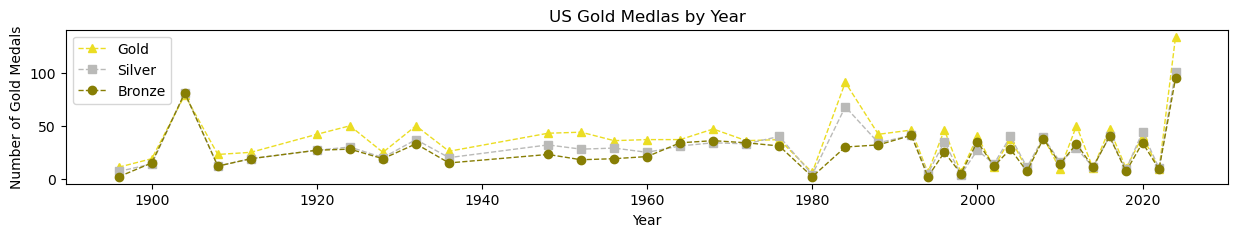

In [9]:
# filter our data

usGold = resultsdf[(resultsdf.Country == 'United States of America') & (resultsdf.Medal == 'Gold')]
usSilver = resultsdf[(resultsdf.Country == 'United States of America') & (resultsdf.Medal == 'Silver')]
usBronze =  resultsdf[(resultsdf.Country == 'United States of America') & (resultsdf.Medal == 'Bronze')]

# Group data to count the number of medals

usGoldYr = usGold.groupby('Year')['Medal'].count()
usSilverYr = usSilver.groupby('Year')['Medal'].count()
usBronzeYr = usBronze.groupby('Year')['Medal'].count()

# Visualize the data

plt.figure(figsize = (15, 2))

#Format the look of the line

plt.plot(usGoldYr.index, usGoldYr.values, color = '#ebdd23', linestyle = '--', linewidth = 1, marker = '^', markersize = 6, label = 'Gold')
plt.plot(usSilverYr.index, usSilverYr.values, color = '#babab8', linestyle = '--', linewidth = 1, marker = 's', markersize = 6, label = 'Silver')
plt.plot(usBronzeYr.index, usBronzeYr.values, color = '#877e04', linestyle = '--', linewidth = 1, marker = 'o', markersize = 6, label = 'Bronze')

plt.title("US Gold Medlas by Year")
plt.xlabel('Year')
plt.ylabel('Number of Gold Medals')
plt.legend()


plt.show()

### Scatter Plot

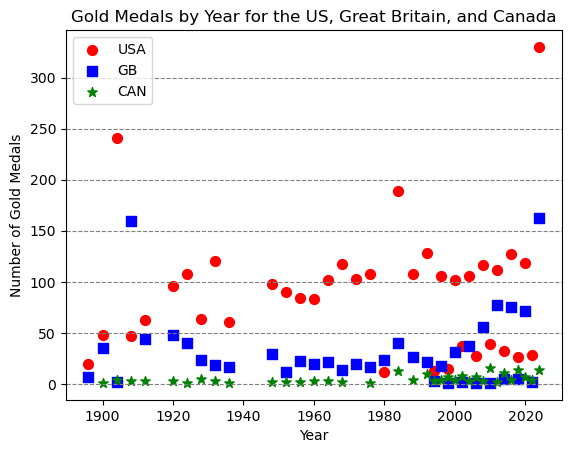

In [10]:
# Lets compare a few countries

medalsGold = resultsdf[(resultsdf.Country == 'United States of America') |
                        (resultsdf.Country == 'Sweden') |
                        (resultsdf.Country == 'Great Britain') |
                        (resultsdf.Country == 'Canada') &
                        (resultsdf.Medal == 'Gold')]

# Group data by Year and Country. Count the number of medals

medalsByYrCountry = medalsGold.groupby(['Year', 'Country']).size().reset_index(name = "Gold Medals")

# Group by year Year and Country

medalsByYr = medalsGold.groupby('Year')['Medal'].count()

# Create a pivot table to create a matris with years a srows and Counries as columns

medalsPivot = medalsByYrCountry.pivot(index = 'Year', columns = 'Country', values = 'Gold Medals')

# Create the scatter plot

plt.scatter(medalsPivot.index, medalsPivot['United States of America'], label = 'USA', color = 'red', marker = 'o', s = 50)
plt.scatter(medalsPivot.index, medalsPivot['Great Britain'], label = 'GB', color = 'blue', marker = 's', s = 50)
plt.scatter(medalsPivot.index, medalsPivot['Canada'], label = 'CAN', color = 'green', marker = '*', s = 50)

# Style the chart

plt.title("Gold Medals by Year for the US, Great Britain, and Canada")
plt.xlabel("Year")
plt.ylabel("Number of Gold Medals")
plt.legend()

plt.grid(axis = 'y', linestyle = '--', color = 'gray')


In [11]:
import seaborn as sns

C:\Users\Aidan Keating\AppData\Local\Temp\ipykernel_12504\3245309102.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


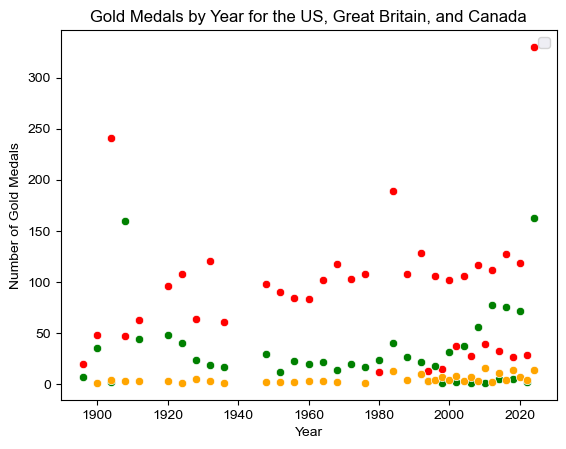

In [12]:
# Seaborn line plot

medalsGold = resultsdf[(resultsdf.Country == 'United States of America') |
                        (resultsdf.Country == 'Sweden') |
                        (resultsdf.Country == 'Great Britain') |
                        (resultsdf.Country == 'Canada') &
                        (resultsdf.Medal == 'Gold')]

# Group data by Year and Country. Count the number of medals

medalsByYrCountry = medalsGold.groupby(['Year', 'Country']).size().reset_index(name = "Gold Medals")

# Group by year Year and Country

medalsByYr = medalsGold.groupby('Year')['Medal'].count()

# Create a pivot table to create a matris with years a srows and Counries as columns

medalsPivot = medalsByYrCountry.pivot(index = 'Year', columns = 'Country', values = 'Gold Medals')

# Create the scatter plot

sns.scatterplot(data = medalsByYrCountry[medalsByYrCountry['Country'] == 'United States of America'], x = 'Year', y = 'Gold Medals', color = 'red')
sns.scatterplot(data = medalsByYrCountry[medalsByYrCountry['Country'] == 'Swedan'], x = 'Year', y = 'Gold Medals', color = 'blue')
sns.scatterplot(data = medalsByYrCountry[medalsByYrCountry['Country'] == 'Great Britain'], x = 'Year', y = 'Gold Medals', color = 'green')
sns.scatterplot(data = medalsByYrCountry[medalsByYrCountry['Country'] == 'Canada'], x = 'Year', y = 'Gold Medals', color = 'orange')

# Style the chart

sns.set_style("darkgrid")

plt.title("Gold Medals by Year for the US, Great Britain, and Canada")
plt.xlabel("Year")
plt.ylabel("Number of Gold Medals")
plt.legend()

plt.show()


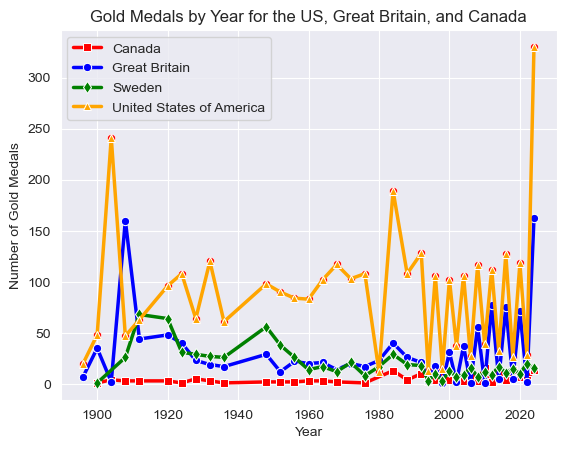

In [13]:
# Seaborn line plot

medalsGold = resultsdf[(resultsdf.Country == 'United States of America') |
                        (resultsdf.Country == 'Sweden') |
                        (resultsdf.Country == 'Great Britain') |
                        (resultsdf.Country == 'Canada') &
                        (resultsdf.Medal == 'Gold')]

# Group data by Year and Country. Count the number of medals

medalsByYrCountry = medalsGold.groupby(['Year', 'Country']).size().reset_index(name = "Gold Medals")

# Group by year Year and Country

medalsByYr = medalsGold.groupby('Year')['Medal'].count()

# Create a pivot table to create a matris with years a srows and Counries as columns

medalsPivot = medalsByYrCountry.pivot(index = 'Year', columns = 'Country', values = 'Gold Medals')

# Create the scatter plot

sns.scatterplot(data = medalsByYrCountry[medalsByYrCountry['Country'] == 'United States of America'], x = 'Year', y = 'Gold Medals', color = 'red')
sns.scatterplot(data = medalsByYrCountry[medalsByYrCountry['Country'] == 'Swedan'], x = 'Year', y = 'Gold Medals', color = 'blue')
sns.scatterplot(data = medalsByYrCountry[medalsByYrCountry['Country'] == 'Great Britain'], x = 'Year', y = 'Gold Medals', color = 'green')
sns.scatterplot(data = medalsByYrCountry[medalsByYrCountry['Country'] == 'Canada'], x = 'Year', y = 'Gold Medals', color = 'orange')

# Style the chart

sns.set_style("darkgrid")

sns.lineplot(data = medalsPivot, dashes = False, linewidth = 2.5, palette = ['red', 'blue', 'green', 'orange'], markers = ['s', 'o', 'd', '^'])

plt.title("Gold Medals by Year for the US, Great Britain, and Canada")
plt.xlabel("Year")
plt.ylabel("Number of Gold Medals")
plt.legend()

plt.show()


In [14]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [15]:
dfCars = sns.load_dataset('car_crashes')

dfCars.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


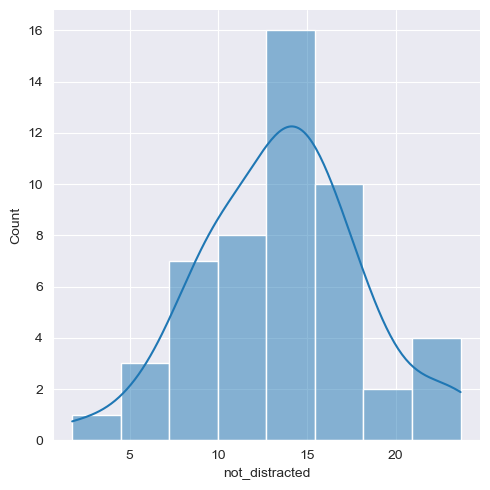

In [16]:
sns.displot(dfCars['not_distracted'], kde = True)

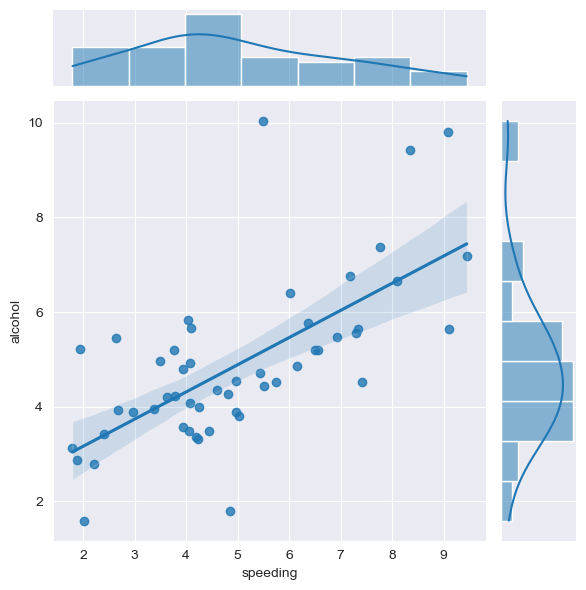

In [17]:
sns.jointplot(x = 'speeding', y = 'alcohol', data = dfCars, kind = 'reg')

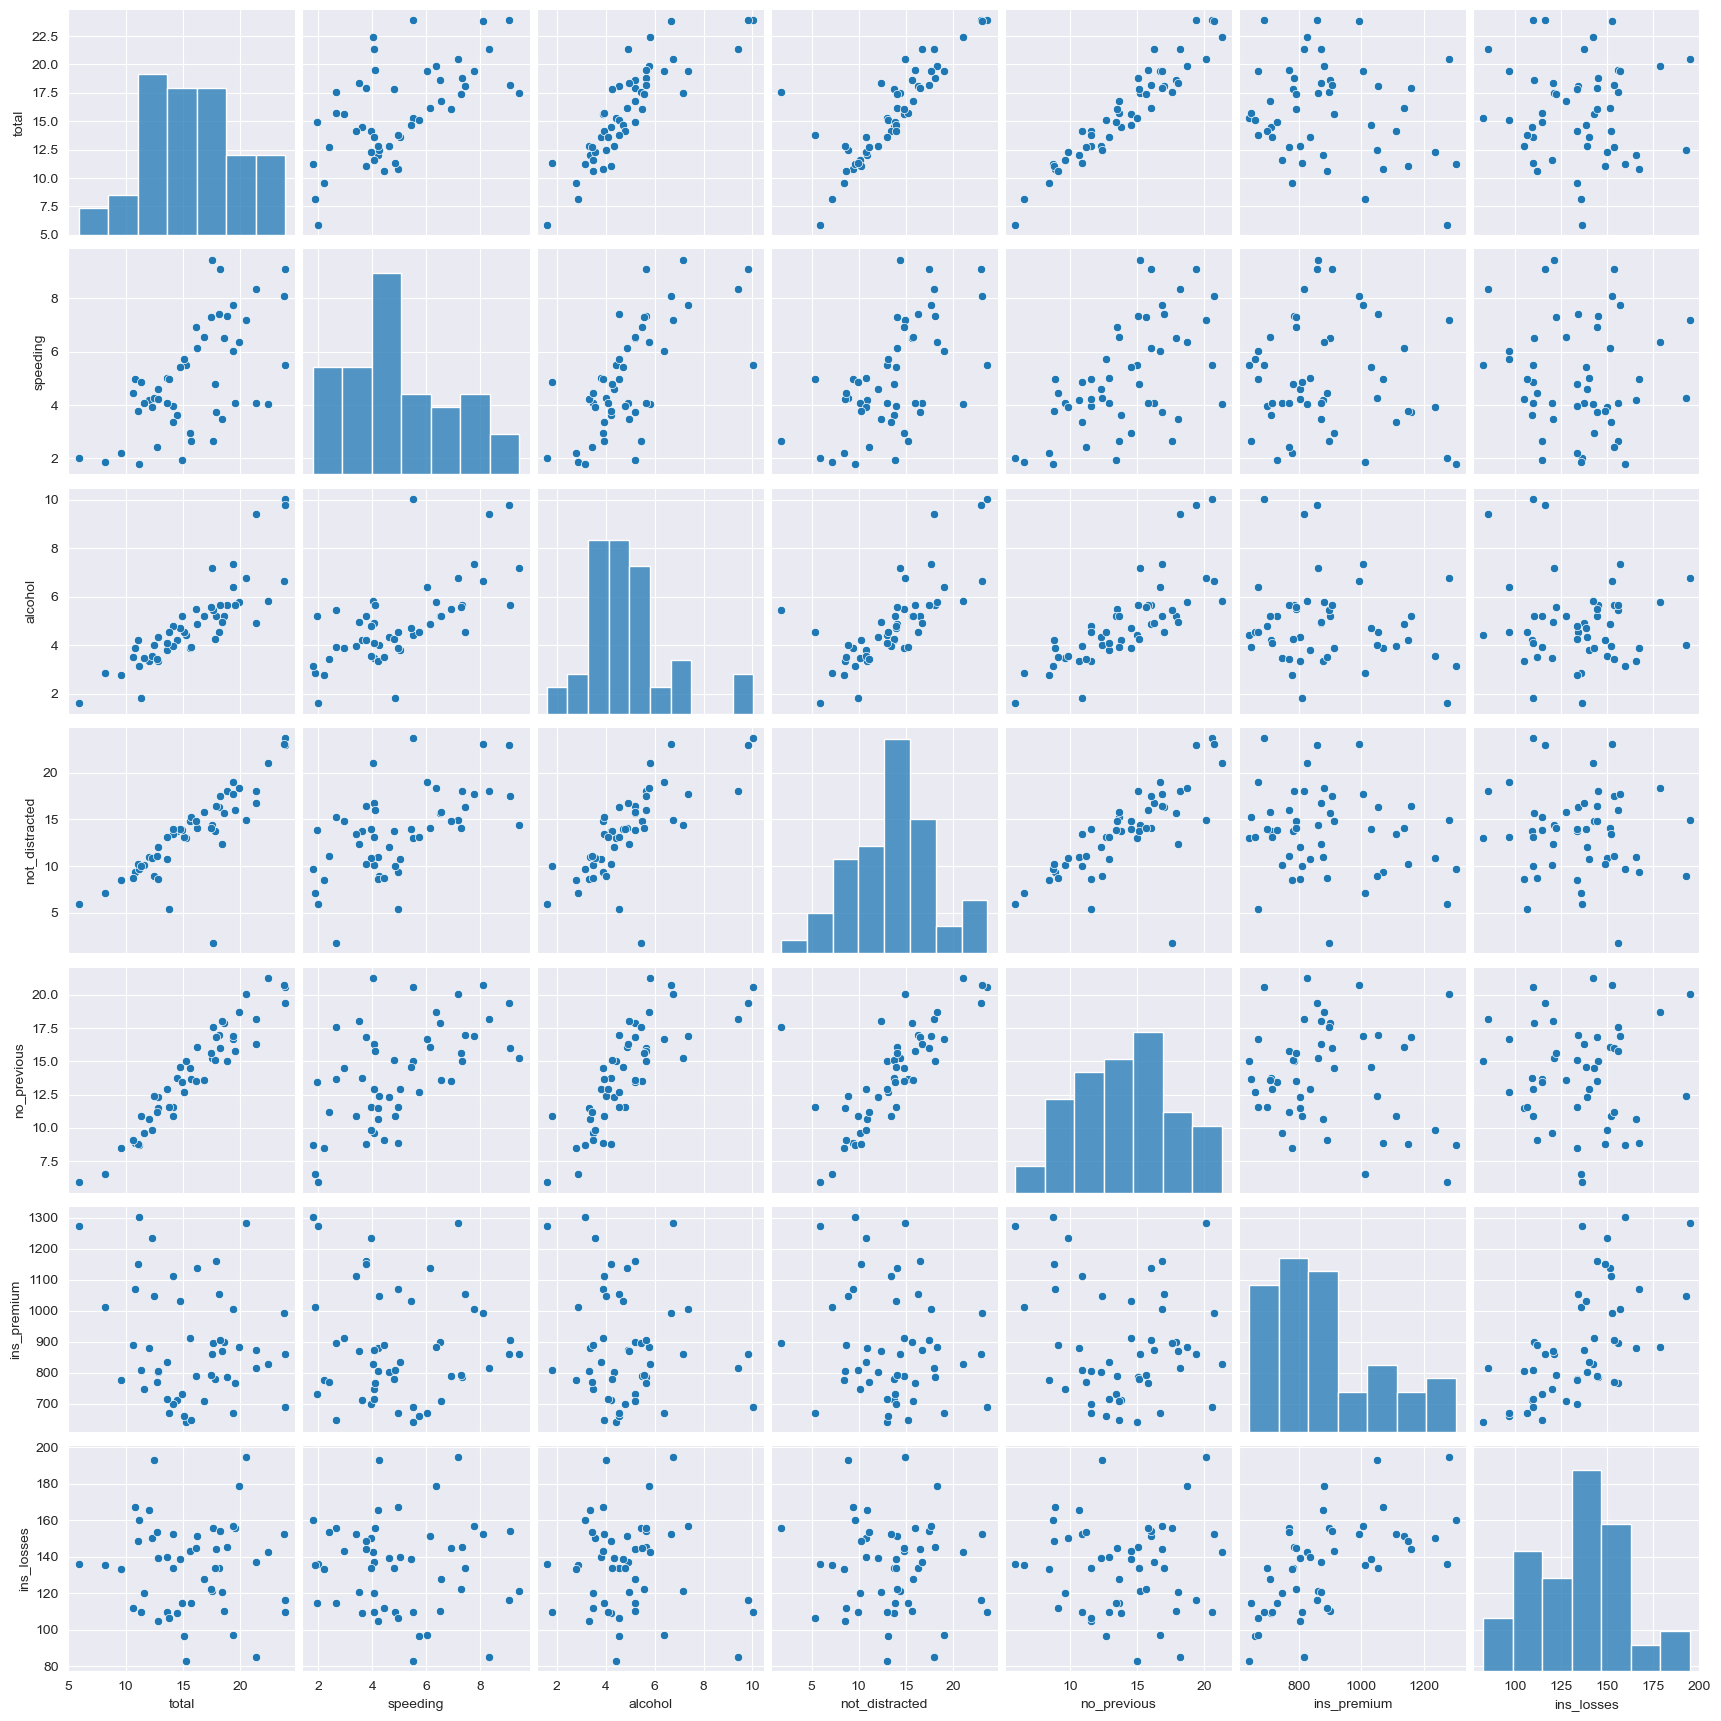

In [18]:
sns.pairplot(dfCars)

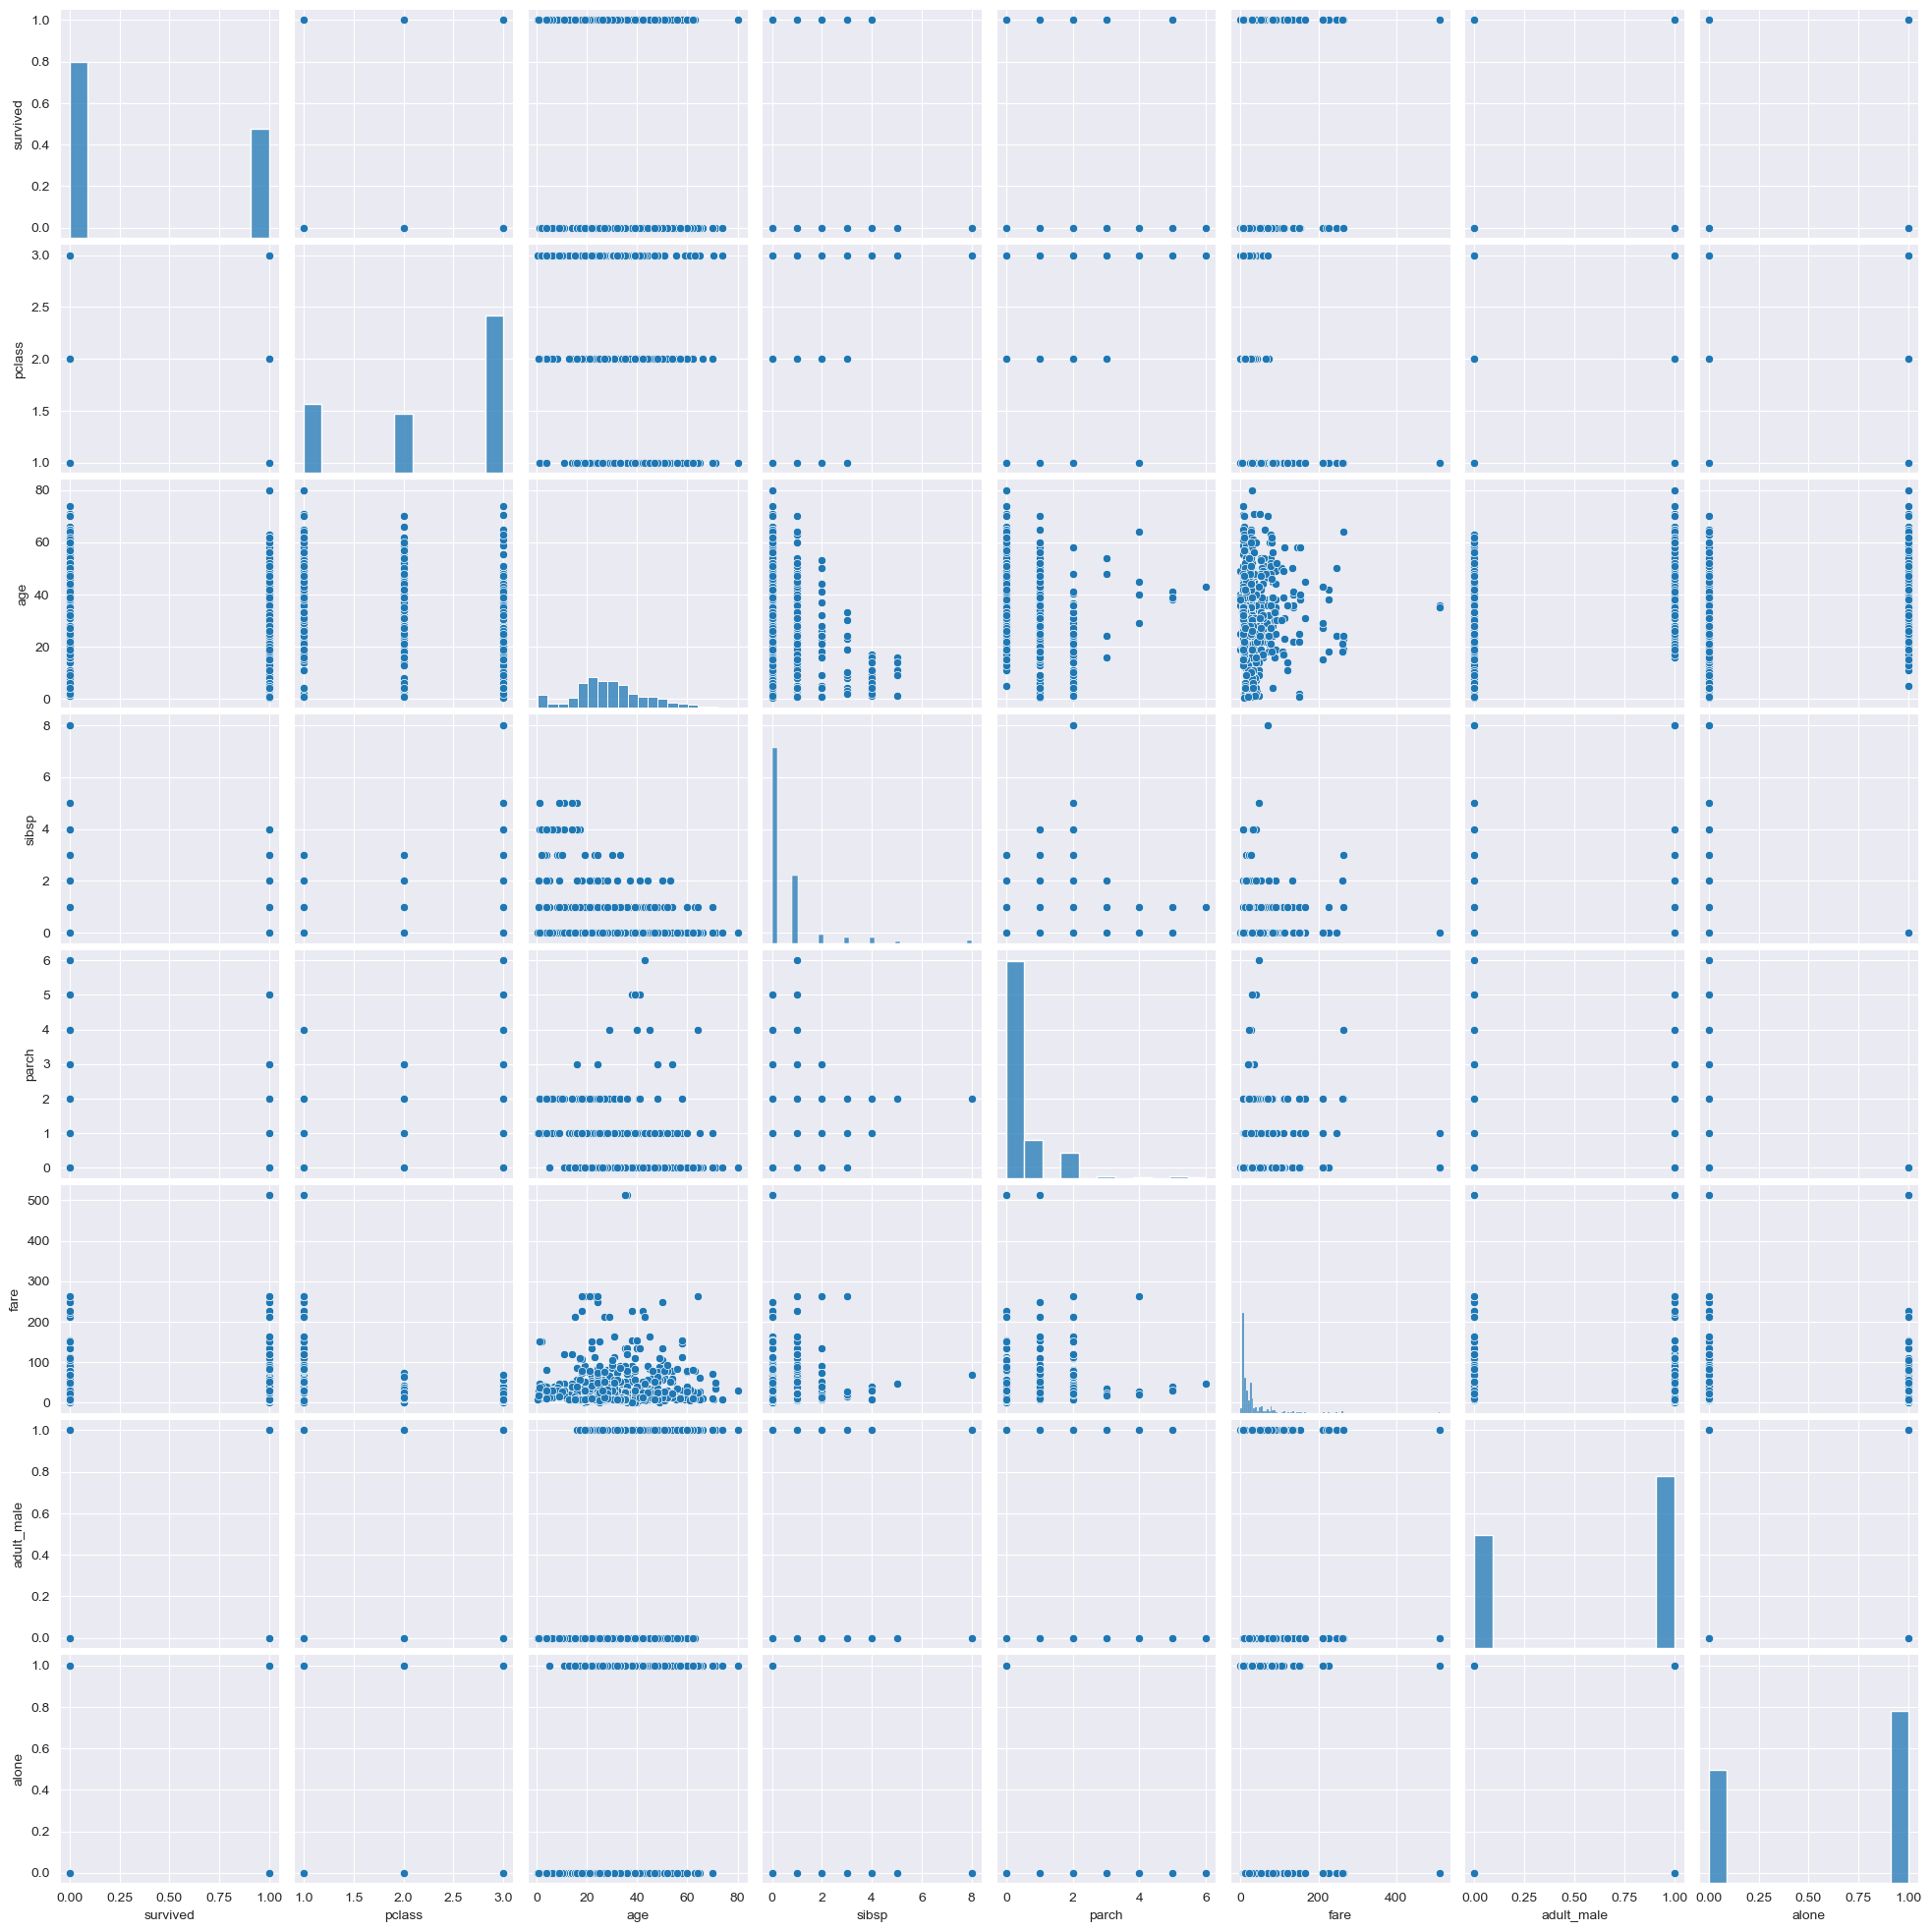

In [19]:
dfTitanic = sns.load_dataset('titanic')

sns.pairplot(dfTitanic)